In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
dataset = pd.read_csv('clickbait_data.csv')

In [4]:
dataset

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [5]:
len(dataset)

32000

In [6]:
dataset['clickbait'].value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

In [7]:
x_data = dataset[['headline']]
y_data = dataset[['clickbait']]

# lower text

In [8]:
x_data['headline'] = x_data["headline"].str.lower()
x_data.head()

C:\Users\pushp\AppData\Local\Temp\ipykernel_11396\1893173189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['headline'] = x_data["headline"].str.lower()


,headline
0,should i get bings
1,which tv female friend group do you belong in
2,"the new ""star wars: the force awakens"" trailer..."
3,"this vine of new york on ""celebrity big brothe..."
4,a couple did a stunning photo shoot with their...


# remove punctuations

In [9]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

x_data["headline"] = x_data["headline"].apply(lambda text: remove_punctuation(text))
x_data.head()

C:\Users\pushp\AppData\Local\Temp\ipykernel_11396\1136997293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["headline"] = x_data["headline"].apply(lambda text: remove_punctuation(text))


,headline
0,should i get bings
1,which tv female friend group do you belong in
2,the new star wars the force awakens trailer is...
3,this vine of new york on celebrity big brother...
4,a couple did a stunning photo shoot with their...


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

x_data["headline"] = x_data["headline"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pushp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\pushp\AppData\Local\Temp\ipykernel_11396\1062190837.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["headline"] = x_data["headline"].apply(lambda text: remove_stopwords(text))


In [11]:
x_data

,headline
0,get bings
1,tv female friend group belong
2,new star wars force awakens trailer give chills
3,vine new york celebrity big brother fucking pe...
4,couple stunning photo shoot baby learning inop...
...,...
31995,make female hearts flutter iraq throw shoe
31996,british liberal democrat patsy calton 56 dies ...
31997,drone smartphone app help heart attack victims...
31998,netanyahu urges pope benedict israel denounce ...


In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

x_data["headline"] = x_data["headline"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pushp\AppData\Roaming\nltk_data...
C:\Users\pushp\AppData\Local\Temp\ipykernel_10300\2625253040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["headline"] = x_data["headline"].apply(lambda text: lemmatize_words(text))


In [12]:
#!pip3 install wordcloud
from wordcloud import WordCloud

In [13]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

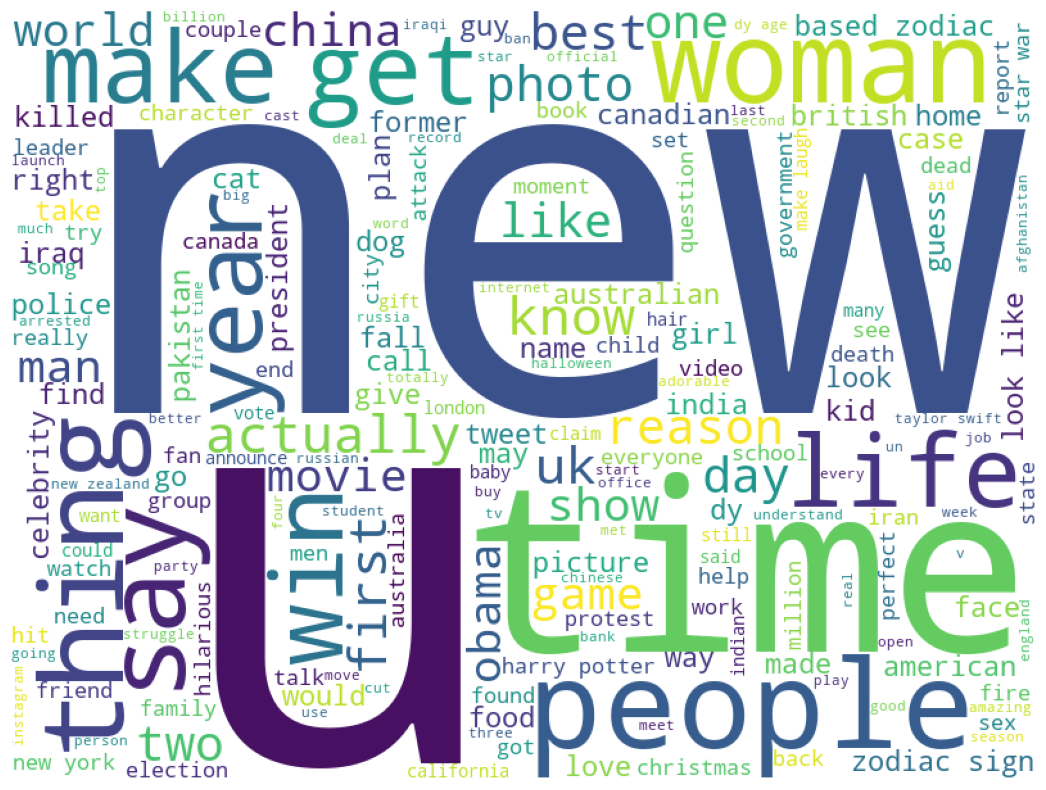

In [17]:
cloud(' '.join(x_data['headline']))

# calculate length of each tweet to use it as a feature and add it as a feature to each row

In [45]:
nb.fit(x_train,y_train)

C:\Users\pushp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
pred_nb = nb.predict(x_test)

In [ ]:
pred_nb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_nb = confusion_matrix(y_test, pred_nb)


In [ ]:
print(cm_nb)

[[ 346 2778]
 [  64 3212]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr_nb = classification_report(y_test,pred_nb,digits = 5)

In [ ]:
print(cr_nb)

              precision    recall  f1-score   support

           0    0.84390   0.11076   0.19581      3124
           1    0.53623   0.98046   0.69329      3276

    accuracy                        0.55594      6400
   macro avg    0.69006   0.54561   0.44455      6400
weighted avg    0.68641   0.55594   0.45046      6400



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)

<ipython-input-55-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
cm_nb = confusion_matrix(y_test, rfc_pred)


In [ ]:
print(cm_nb)

[[2676  448]
 [ 491 2785]]


In [ ]:
cr_nb = classification_report(y_test,rfc_pred,digits = 5)

# random forest classification

In [ ]:
print(cr_nb)

              precision    recall  f1-score   support

           0    0.84496   0.85659   0.85074      3124
           1    0.86143   0.85012   0.85574      3276

    accuracy                        0.85328      6400
   macro avg    0.85320   0.85336   0.85324      6400
weighted avg    0.85339   0.85328   0.85330      6400

